In [1]:
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy import stats, signal
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from scipy.signal import find_peaks, savgol_filter
from scipy.stats import entropy, skew, kurtosis
from scipy.signal import welch
from numpy import cov
import matplotlib.colors as mcolors
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AutoReg
from IPython.core.interactiveshell import InteractiveShell
# from plotly.graph_objs import go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as pyo
import json
import warnings
import math
import scipy as sp
import scipy.fftpack
import os
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
# Lấy thư mục làm việc hiện tại trong Jupyter Notebook
import warnings
warnings.filterwarnings("ignore")
current_file_directory = os.getcwd()

# Chuyển thư mục làm việc
os.chdir(current_file_directory)
import tkinter as tk
from tkinter import messagebox
import pickle
import easygui
import joblib
import sys
import xgboost as xgb
def model_size_in_bytes(model):
    return len(pickle.dumps(model))
# Hàm tính toán Accuracy, Sensitivity, Specificity và F1-Score cho mỗi ma trận nhầm lẫn
def calculate_metrics(conf_matrix):
    # Tính toán True Positives (TP), False Positives (FP), False Negatives (FN), và True Negatives (TN)
    TP = np.diag(conf_matrix)  # Các giá trị trên đường chéo (True Positives)
    FP = np.sum(conf_matrix, axis=0) - TP  # Tổng các giá trị cột - TP (False Positives)
    FN = np.sum(conf_matrix, axis=1) - TP  # Tổng các giá trị hàng - TP (False Negatives)
    TN = np.sum(conf_matrix) - (TP + FP + FN)  # Tổng số mẫu - TP - FP - FN (True Negatives)

    # Tính Accuracy, Sensitivity, Specificity cho từng lớp
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Tính Precision cho từng lớp
    precision = TP / (TP + FP)
    
    # Tính F1-Score cho từng lớp
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    # Tính độ chính xác trung bình của các lớp
    avg_accuracy = np.mean(accuracy)
    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_f1_score = np.nanmean(f1_score)  # Dùng nanmean để bỏ qua các giá trị nan nếu có

    return avg_accuracy, avg_sensitivity, avg_specificity, avg_f1_score

def feature_selection_with_rf(train_features, test_features, label_train, label_test, feature_names, threshold):
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier

    remaining_features = feature_names.copy()
    X_train, X_test = np.array(train_features), np.array(test_features)
    
    removed_features_all = []  # Danh sách chứa các đặc trưng bị loại bỏ và giá trị quan trọng của chúng

    while len(remaining_features) > 1:
        # Huấn luyện Random Forest
        clf = RandomForestClassifier(n_estimators=14,max_depth=18,max_features='sqrt',bootstrap=False, random_state=20)
        clf.fit(X_train, label_train)

        # Tầm quan trọng của đặc trưng
        importances = clf.feature_importances_

        # Sắp xếp theo thứ tự giảm dần (cao -> thấp)
        sorted_idx = np.argsort(importances)[::-1]
        sorted_importances = importances[sorted_idx]
        sorted_features = [remaining_features[i] for i in sorted_idx]

        # Lọc các đặc trưng có độ quan trọng >= threshold
        important_indices = sorted_idx[sorted_importances >= threshold]
        removed_indices = sorted_idx[sorted_importances < threshold]

        # Nếu không còn đặc trưng nào dưới ngưỡng, thoát vòng lặp
        if len(removed_indices) == 0:
            # print("No features removed (all importance >= threshold).")
            break

        # Lưu các đặc trưng bị loại bỏ và giá trị quan trọng của chúng
        removed_features = [(remaining_features[i], importances[i]) for i in removed_indices]
        removed_features_all.extend(removed_features)
        # print(f"Removing features: {', '.join([f'{f[0]} ({f[1]:.4f})' for f in removed_features])}")

        # Cập nhật tập dữ liệu và danh sách đặc trưng còn lại
        remaining_features = [remaining_features[i] for i in important_indices]
        X_train = X_train[:, important_indices]
        X_test = X_test[:, important_indices]

    # Chuẩn bị dữ liệu cho biểu đồ
    final_importances = clf.feature_importances_
    sorted_idx = np.argsort(final_importances)[::-1]
    remaining_features_sorted = [remaining_features[i] for i in sorted_idx]
    remaining_importances_sorted = final_importances[sorted_idx]

    removed_features_sorted = sorted(removed_features_all, key=lambda x: x[1], reverse=True)
    removed_feature_names = [f[0] for f in removed_features_sorted]
    removed_importances = [f[1] for f in removed_features_sorted]

    all_features = remaining_features_sorted + removed_feature_names
    all_importances = list(remaining_importances_sorted) + list(removed_importances)
    all_colors = ['skyblue'] * len(remaining_features_sorted) + ['red'] * len(removed_feature_names)

    # Tính độ lệch chuẩn của tất cả các giá trị quan trọng
    all_importances_std = np.std(all_importances)
    print(f"\nStandard deviation of importance scores (including removed and remaining features): {all_importances_std:.4f}")
    print(f"\n Mean of importance scores (including removed and remaining features): {np.mean(all_importances):.4f}")
    # Vẽ biểu đồ gộp
    plt.figure(figsize=(8, max(6, len(all_features) * 0.15)))
    plt.barh(all_features, all_importances, color=all_colors)
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Đảm bảo các đặc trưng quan trọng nhất ở trên cùng
    # Thêm chú thích
    important_patch = plt.Line2D([0], [0], color='skyblue', lw=4, label='Important Features')
    less_important_patch = plt.Line2D([0], [0], color='red', lw=4, label='Less Important Features')
    plt.legend(handles=[important_patch, less_important_patch], loc='lower right')

    plt.tight_layout()
    plt.show()

    # print("\nFinal remaining features:")
    # for feature, importance in zip(remaining_features_sorted, remaining_importances_sorted):
    #     print(f"{feature}")

    # print("\nRemoved features (sorted by importance):")
    # for feature, importance in removed_features_sorted:
    #     print(f"{feature}: {importance:.4f}")

    return X_train, X_test, remaining_features



def peak_finding(data, window_size, height, distance, width):
    data_extended = np.concatenate([np.zeros(window_size), data, np.zeros(window_size)])
    max_index = []
    max_var = []
    last_peak = -width
    if last_peak == 0:
        last_peak = -window_size
    peak_start = width  
    # _var = np.std(data)+np.mean(data)**2
    _var = 0
    
    # print("setup tham sô: window_size= ",window_size, ", minpeak=", height,", distance =", distance, "width=",width)

    for i, value in enumerate(data_extended):
        if (i >= window_size) and (i < len(data_extended) - window_size):
            try:
                check_value = -1
                max_left = data_extended[(i - window_size) : i + 1].max()
                max_right = data_extended[i : (i + window_size) + 1].max()
                check_value = data_extended[i] - ((max_left + max_right) / 2)
                _var =  (data_extended[i] - np.mean( data_extended[(i - window_size) : (i + window_size) + 1]))
            except ValueError:
                pass

            if check_value >= 0:
                if (i-window_size - peak_start) >= width and data_extended[i] >= height and (i-window_size - last_peak) >= distance:
                        max_index.append(i - window_size)
                        max_var.append(data[i - window_size])
                        last_peak = i - window_size
                        peak_start = i - window_size

    return (max_index, max_var)

import numpy as np

def compute_velocity_from_peaks(data, window_size, height, distance, width):
    peak_indices, peak_values = peak_finding(data, window_size, height, distance, width)

    if len(peak_indices) >= 2:
        peak_indices = np.array(peak_indices)
        peak_values = np.array(peak_values)

        delta_position = np.diff(peak_values)
        delta_time = np.diff(peak_indices)

        velocity = delta_position / delta_time  # v = Δx / Δt
        return list(velocity), list(peak_indices), list(peak_values)

    elif len(peak_indices) == 1:
        return [0], [peak_indices[0]], [peak_values[0]]  # 1 đỉnh: vận tốc = 0

    else:
        return [0], [0], [0]  # Không có đỉnh: tất cả là 0


In [2]:
# 0xx. đi ,1xx. đứng, 2xx. nằm, 3xx. ngồi, 4xx. chạy bộ, 5xx. đi khom lưng, 6xx. bò thấp, 7xx. bò trườn, 8xx. ngã, 9xx Downstair i.xxx upstair
w_Walking  = []; w_Standing = []; w_Lying = []; w_Sitting= []; w_Jogging = []; w_WalkStoop = []; w_Crawling= [];  w_Slithering =[]; w_Falling =[] ; w_DownStair = []; w_UpStair =[]
# class_names = ['walking','Standing', 'Lying', 'Sitting','Jogging','WalkStoop','Crawling','Slithering','Falling', 'Downstair', 'Upstair']
class_names = ['WA','ST', 'LY', 'SI','JO','WS','CR','SL','FA', 'DS', 'US']
_columns = ['timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']
n_sample =np.zeros(11)

# Danh sách các đường dẫn có thể
possible_dirs = [
    'G:/My Drive/NCSHieu/linh cuu hoa/dataset/DatasetFireFighters/',
    'D:/NCSHieuServer/My Drive/NCSHieu/linh cuu hoa/dataset/DatasetFireFighters/',
    'C:/Users/Pi/My Drive/NCSHieu/linh cuu hoa/dataset/DatasetFireFighters/'
]
# Tìm đường dẫn tồn tại đầu tiên
_dir = next((d for d in possible_dirs if os.path.exists(d)), None)
train_feature_ = joblib.load(_dir+'X_train_reduced.pkl')
test_feature_ = joblib.load(_dir+'X_test_reduced.pkl')
label_test_ = joblib.load(_dir+'label_test_Server.pkl')
label_train_ = joblib.load(_dir+'label_train_Server.pkl')
best_params_ = joblib.load(_dir+'best_params.pkl')


Tham số tối ưu: 16
Độ chính xác tối ưu: 91.7
Kích thước mô hình (MB): 0.057


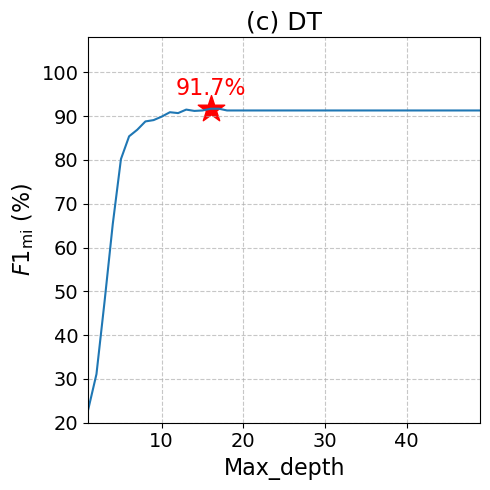

In [5]:
# from sklearn.tree import DecisionTreeClassifier
# import pandas as pd
# import numpy as np
# import joblib
# import os
# import matplotlib.pyplot as plt

# # Khảo sát cây quyết định
# param_dist = {'max_depth': range(1, 50, 1)}

# results = []

# for max_depth_ in param_dist['max_depth']:
#     # Huấn luyện mô hình
#     clf2 = DecisionTreeClassifier(max_depth=max_depth_,random_state=22).fit(train_feature_, label_train_)
    
#     # Dự đoán và tính accuracy
#     score = clf2.score(test_feature_, label_test_)
    
#     # Tính kích thước mô hình
#     model_size = model_size_in_bytes(clf2) / 1024**2  # đổi sang MB
#     # Lưu kết quả
#     results.append({
#         'max_depth': max_depth_,
#         'score': round(score * 100, 1),
#         'ModelSize': round(model_size, 3)
#     })

# # Chuyển vào DataFrame
# results_df_DT = pd.DataFrame(results)
# results_df_DT.to_csv(_dir+"search_results_DT.csv", index=False)


# Đọc lại file CSV
results_df_DT = pd.read_csv(_dir + "search_results_DT.csv")

# Tìm best_params SAU khi đã có DataFrame
valid_models = results_df_DT[results_df_DT['ModelSize'] <= 1.0]
if not valid_models.empty:
    best_row = valid_models.loc[valid_models['score'].idxmax()]
    best_params = {
        'max_depth': int(best_row['max_depth']),
        'score': best_row['score'],
        'ModelSize': best_row['ModelSize']
    }

    print("Tham số tối ưu:", best_params['max_depth'])
    print("Độ chính xác tối ưu:", best_params['score'])
    print("Kích thước mô hình (MB):", best_params['ModelSize'])
else:
    print("Không có mô hình nào đạt yêu cầu kích thước ≤ 1MB.")
    best_params = None

# Chuẩn bị cho biểu đồ
results_df_DT_sorted_DT = results_df_DT.sort_values('max_depth')

# Tìm vùng tô (với model ≤ 1MB)
valid_depths = valid_models['max_depth'].tolist()
if valid_depths:
    min_valid_depth = min(valid_depths)
    max_valid_depth = max(valid_depths)
else:
    min_valid_depth = max_valid_depth = None

# Vẽ biểu đồ
plt.figure(figsize=(5, 5))
plt.plot(results_df_DT_sorted_DT['max_depth'], results_df_DT_sorted_DT['score'], linestyle='-')

# # Tô vùng có kích thước model ≤ 1MB
# if min_valid_depth is not None:
#     plt.axvspan(min_valid_depth, max_valid_depth, color='green', alpha=0.25, label='Model ≤ 1MB')

# Đánh dấu điểm cao nhất trong vùng hợp lệ
if best_params:
    plt.scatter(best_params['max_depth'], best_params['score'], color='red', s=400, marker='*',
                label=f" max point: ({best_params['score']:.1f}%)")
    plt.annotate(f'{best_params["score"]:.1f}%', 
                 (best_params['max_depth'], best_params['score']),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', 
                 fontsize=16,  
                 color='red')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel('Max_depth', fontsize=16)
plt.xlim(1, 49)
plt.ylim(20, 108)
plt.title('(c) DT', fontsize=18)
plt.ylabel(r'$F1_{\mathrm{mi}}$ (%)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()
plt.show()


In [5]:
best_params_

n_estimators    17.0
max_depth       14.0
random_state    31.0
score           96.4
Name: 3396, dtype: float64

Tham số tối ưu: {'n_estimators': 17, 'max_depth': 14, 'score': 96.1, 'ModelSize': 0.922}


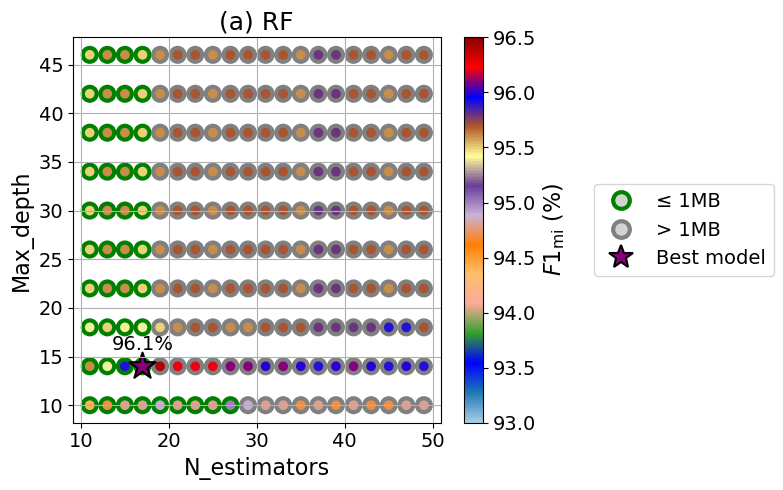

In [6]:
# # tìm tham số tốt nhất cho RF
# param_dist = {
#     'n_estimators': range(11, 50, 2),
#     'max_depth': range(10, 50, 4),
# }

# results = []

# # Grid Search thủ công
# for n_estimators_ in param_dist['n_estimators']:
#     for max_depth_ in param_dist['max_depth']:
#         clf4 = RandomForestClassifier(
#             criterion='entropy',class_weight='balanced',n_estimators=n_estimators_,max_depth=max_depth_,
#             max_features='sqrt',bootstrap=True,ccp_alpha=0.0005, warm_start=False, n_jobs=-1,
#             random_state=45).fit(train_feature_, label_train_)

#         score = clf4.score(test_feature_, label_test_)
#         model_size = model_size_in_bytes(clf4) / 1024**2  # MB

#         results.append({
#             'n_estimators': n_estimators_,
#             'max_depth': max_depth_,
#             'score': round(score * 100, 1),
#             'ModelSize': round(model_size, 3)
#         })

# # Ghi file kết quả
# results_df_RF = pd.DataFrame(results)
# results_df_RF.to_csv(_dir + 'search_results_RF.csv', index=False)
results_df_RF = pd.read_csv(_dir+ 'search_results_RF.csv')
# Tìm mô hình tốt nhất sau khi đã có DataFrame kết quả
valid_models = results_df_RF[results_df_RF['ModelSize'] <= 1.0]
best_params = None
if not valid_models.empty:
    best_row = valid_models.sort_values(by=['score', 'n_estimators', 'max_depth'], ascending=[False, True, True]).iloc[0]
    best_params = {
        'n_estimators': int(best_row['n_estimators']),
        'max_depth': int(best_row['max_depth']),
        'score': best_row['score'],
        'ModelSize': best_row['ModelSize']
    }
# In ra thông tin mô hình tốt nhất
if best_params:
    print("Tham số tối ưu:", best_params)
else:
    print("Không có mô hình nào đạt yêu cầu kích thước ≤ 1MB.")
# Color map cho độ chính xác
color_list = ["#a6cee3", "#1f78b4", "#0000ff", "#33a02c", "#fbaa99", "#fdbf6f", "#ff7f00", "#cab2d6",
              "#6a3d9a", "#ffff99", "#b15928", "#0000ff", "#ff0000", "#8B0000"]

nodes = np.linspace(0, 1, len(color_list))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, color_list)))
norm = mcolors.Normalize(vmin=93, vmax=96.5)
# Khởi tạo figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [3, 1]})
# === Biểu đồ bên trái (không legend) ===
ax = axs[0]
valid = results_df_RF['ModelSize'] <= 1.0
invalid = ~valid
# Scatter plot
scatter_valid = ax.scatter(results_df_RF.loc[valid, 'n_estimators'],
                           results_df_RF.loc[valid, 'max_depth'],
                           c=results_df_RF.loc[valid, 'score'],
                           cmap=cmap, norm=norm, s=100,
                           edgecolors='green', linewidths=3)
scatter_invalid = ax.scatter(results_df_RF.loc[invalid, 'n_estimators'],
                             results_df_RF.loc[invalid, 'max_depth'],
                             c=results_df_RF.loc[invalid, 'score'],
                             cmap=cmap, norm=norm, s=100,
                             edgecolors='gray', linewidths=3)
# Best model star
if best_params:
    ax.scatter(best_params['n_estimators'], best_params['max_depth'],
               color=cmap(norm(best_params['score'])), s=400, marker='*',
               edgecolors='black', linewidths=1.5)

    ax.annotate(f"{best_params['score']:.1f}%", 
                (best_params['n_estimators'], best_params['max_depth']),
                textcoords="offset points", xytext=(0, 12), ha='center',
                fontsize=14, color='black')
# Title và nhãn
ax.set_title('(a) RF', fontsize=18)
ax.set_xlabel('N_estimators', fontsize=16)
ax.set_ylabel('Max_depth', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)
# Colorbar
cbar = fig.colorbar(scatter_valid, ax=ax)
cbar.set_label(r'$F1_{\mathrm{mi}}$ (%)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
# === Biểu đồ bên phải (chỉ legend) ===
ax_legend = axs[1]
ax_legend.axis('off')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='≤ 1MB',
           markerfacecolor='lightgray', markeredgecolor='green',
           markeredgewidth=3, markersize=12, linestyle='None'),
    
    Line2D([0], [0], marker='o', color='w', label='> 1MB',
           markerfacecolor='lightgray', markeredgecolor='gray',
           markeredgewidth=3, markersize=12, linestyle='None'),

    Line2D([0], [0], marker='*', color='black', label='Best model',
           markerfacecolor=cmap(norm(best_params['score'])), markeredgecolor='black',
           markeredgewidth=1.5, markersize=18, linestyle='None')
]
# Thêm legend vào subplot
ax_legend.legend(handles=legend_elements, loc='center', fontsize=14)
plt.tight_layout()
plt.show()

Tham số tối ưu: {'n_estimators': 37, 'max_depth': 14, 'score': 95.5, 'ModelSize': 0.94}


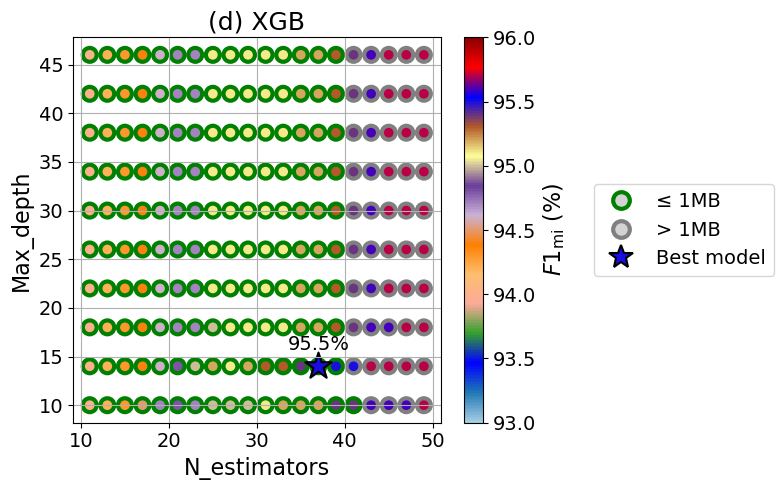

In [13]:
# #Khao sát Xgboost
# param_dist = {
#     'n_estimators': range(11, 50, 2),
#     'max_depth': range(10, 50, 4),
# }

# results = []

# # Grid Search thủ công
# for n_estimators_ in param_dist['n_estimators']:
#     for max_depth_ in param_dist['max_depth']:
#         clf6= xgb.XGBClassifier(n_estimators=n_estimators_, max_depth= max_depth_,learning_rate=0.05,random_state=45).fit(train_feature_, label_train_)

#         score = clf6.score(test_feature_, label_test_)
#         model_size = model_size_in_bytes(clf6) / 1024**2  # MB

#         results.append({
#             'n_estimators': n_estimators_,
#             'max_depth': max_depth_,
#             'score': round(score * 100, 1),
#             'ModelSize': round(model_size, 3)
#         })

# # Ghi file kết quả
# results_df_Xgboost = pd.DataFrame(results)
# results_df_Xgboost.to_csv(_dir + 'search_results_Xgboost.csv', index=False)
results_df_Xgboost = pd.read_csv(_dir+ 'search_results_Xgboost.csv')
# Tìm mô hình tốt nhất sau khi đã có DataFrame kết quả
valid_models = results_df_Xgboost[results_df_Xgboost['ModelSize'] <= 1.0]
best_params = None
if not valid_models.empty:
    best_row = valid_models.sort_values(by=['score', 'n_estimators', 'max_depth'], ascending=[False, True, True]).iloc[0]
    best_params = {
        'n_estimators': int(best_row['n_estimators']),
        'max_depth': int(best_row['max_depth']),
        'score': best_row['score'],
        'ModelSize': best_row['ModelSize']
    }
# In ra thông tin mô hình tốt nhất
if best_params:
    print("Tham số tối ưu:", best_params)
else:
    print("Không có mô hình nào đạt yêu cầu kích thước ≤ 1MB.")
# Color map cho độ chính xác
color_list = ["#a6cee3", "#1f78b4", "#0000ff", "#33a02c", "#fbaa99", "#fdbf6f", "#ff7f00", "#cab2d6",
              "#6a3d9a", "#ffff99", "#b15928", "#0000ff", "#ff0000", "#8B0000"]

nodes = np.linspace(0, 1, len(color_list))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, color_list)))
norm = mcolors.Normalize(vmin=93, vmax=96)
# Khởi tạo figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [3, 1]})
# === Biểu đồ bên trái (không legend) ===
ax = axs[0]
valid = results_df_Xgboost['ModelSize'] <= 1.0
invalid = ~valid
# Scatter plot
scatter_valid = ax.scatter(results_df_Xgboost.loc[valid, 'n_estimators'],
                           results_df_Xgboost.loc[valid, 'max_depth'],
                           c=results_df_Xgboost.loc[valid, 'score'],
                           cmap=cmap, norm=norm, s=100,
                           edgecolors='green', linewidths=3)
scatter_invalid = ax.scatter(results_df_Xgboost.loc[invalid, 'n_estimators'],
                             results_df_Xgboost.loc[invalid, 'max_depth'],
                             c=results_df_Xgboost.loc[invalid, 'score'],
                             cmap=cmap, norm=norm, s=100,
                             edgecolors='gray', linewidths=3)
# Best model star
if best_params:
    ax.scatter(best_params['n_estimators'], best_params['max_depth'],
               color=cmap(norm(best_params['score'])), s=400, marker='*',
               edgecolors='black', linewidths=1.5)

    ax.annotate(f"{best_params['score']:.1f}%", 
                (best_params['n_estimators'], best_params['max_depth']),
                textcoords="offset points", xytext=(0, 12), ha='center',
                fontsize=14, color='black')
# Title và nhãn
ax.set_title('(d) XGB', fontsize=18)
ax.set_xlabel('N_estimators', fontsize=16)
ax.set_ylabel('Max_depth', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)
# Colorbar
cbar = fig.colorbar(scatter_valid, ax=ax)
cbar.set_label(r'$F1_{\mathrm{mi}}$ (%)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
# === Biểu đồ bên phải (chỉ legend) ===
ax_legend = axs[1]
ax_legend.axis('off')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='≤ 1MB',
           markerfacecolor='lightgray', markeredgecolor='green',
           markeredgewidth=3, markersize=12, linestyle='None'),
    
    Line2D([0], [0], marker='o', color='w', label='> 1MB',
           markerfacecolor='lightgray', markeredgecolor='gray',
           markeredgewidth=3, markersize=12, linestyle='None'),

    Line2D([0], [0], marker='*', color='black', label='Best model',
           markerfacecolor=cmap(norm(best_params['score'])), markeredgecolor='black',
           markeredgewidth=1.5, markersize=18, linestyle='None')
]
# Thêm legend vào subplot
ax_legend.legend(handles=legend_elements, loc='center', fontsize=14)
plt.tight_layout()
plt.show()

Tham số tối ưu: {'n_estimators': 27, 'max_depth': 14, 'score': 95.2, 'ModelSize': 0.966}


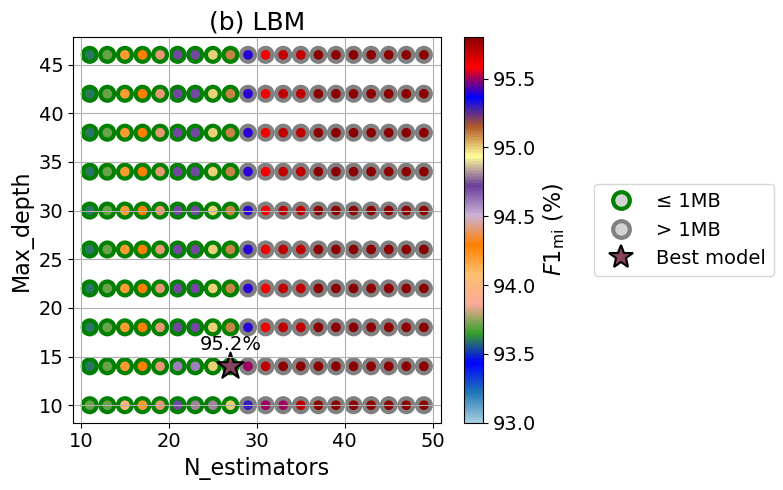

In [12]:
# #Khao sát LightGBM
# param_dist = {
#     'n_estimators': range(11, 50, 2),
#     'max_depth': range(10, 50, 4),
# }

# results = []

# # Grid Search thủ công
# for n_estimators_ in param_dist['n_estimators']:
#     for max_depth_ in param_dist['max_depth']:
#         clf8= lgb.LGBMClassifier(n_estimators=n_estimators_,learning_rate=0.05, max_depth= max_depth_,random_state=22,verbose=-1).fit(train_feature_, label_train_,eval_metric='multi_logloss')
        
#         score = clf8.score(test_feature_, label_test_)
#         model_size = model_size_in_bytes(clf8) / 1024**2  # MB

#         results.append({
#             'n_estimators': n_estimators_,
#             'max_depth': max_depth_,
#             'score': round(score * 100, 1),
#             'ModelSize': round(model_size, 3)
#         })

# # Ghi file kết quả
# results_df_LightGBM = pd.DataFrame(results)
# results_df_LightGBM.to_csv(_dir + 'search_results_LightGBM.csv', index=False)
results_df_LightGBM = pd.read_csv(_dir+ 'search_results_LightGBM.csv')
# Tìm mô hình tốt nhất sau khi đã có DataFrame kết quả
valid_models = results_df_LightGBM[results_df_LightGBM['ModelSize'] <= 1.0]
best_params = None
if not valid_models.empty:
    best_row = valid_models.sort_values(by=['score', 'n_estimators', 'max_depth'], ascending=[False, True, True]).iloc[0]
    best_params = {
        'n_estimators': int(best_row['n_estimators']),
        'max_depth': int(best_row['max_depth']),
        'score': best_row['score'],
        'ModelSize': best_row['ModelSize']
    }
# In ra thông tin mô hình tốt nhất
if best_params:
    print("Tham số tối ưu:", best_params)
else:
    print("Không có mô hình nào đạt yêu cầu kích thước ≤ 1MB.")
# Color map cho độ chính xác
color_list = ["#a6cee3", "#1f78b4", "#0000ff", "#33a02c", "#fbaa99", "#fdbf6f", "#ff7f00", "#cab2d6",
              "#6a3d9a", "#ffff99", "#b15928", "#0000ff", "#ff0000", "#8B0000"]

nodes = np.linspace(0, 1, len(color_list))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, color_list)))
norm = mcolors.Normalize(vmin=93, vmax=95.8)
# Khởi tạo figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [3, 1]})
# === Biểu đồ bên trái (không legend) ===
ax = axs[0]
valid = results_df_LightGBM['ModelSize'] <= 1.0
invalid = ~valid
# Scatter plot
scatter_valid = ax.scatter(results_df_LightGBM.loc[valid, 'n_estimators'],
                           results_df_LightGBM.loc[valid, 'max_depth'],
                           c=results_df_LightGBM.loc[valid, 'score'],
                           cmap=cmap, norm=norm, s=100,
                           edgecolors='green', linewidths=3)
scatter_invalid = ax.scatter(results_df_LightGBM.loc[invalid, 'n_estimators'],
                             results_df_LightGBM.loc[invalid, 'max_depth'],
                             c=results_df_LightGBM.loc[invalid, 'score'],
                             cmap=cmap, norm=norm, s=100,
                             edgecolors='gray', linewidths=3)
# Best model star
if best_params:
    ax.scatter(best_params['n_estimators'], best_params['max_depth'],
               color=cmap(norm(best_params['score'])), s=400, marker='*',
               edgecolors='black', linewidths=1.5)

    ax.annotate(f"{best_params['score']:.1f}%", 
                (best_params['n_estimators'], best_params['max_depth']),
                textcoords="offset points", xytext=(0, 12), ha='center',
                fontsize=14, color='black')
# Title và nhãn
ax.set_title('(b) LBM', fontsize=18)
ax.set_xlabel('N_estimators', fontsize=16)
ax.set_ylabel('Max_depth', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)
# Colorbar
cbar = fig.colorbar(scatter_valid, ax=ax)
cbar.set_label(r'$F1_{\mathrm{mi}}$ (%)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
# === Biểu đồ bên phải (chỉ legend) ===
ax_legend = axs[1]
ax_legend.axis('off')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='≤ 1MB',
           markerfacecolor='lightgray', markeredgecolor='green',
           markeredgewidth=3, markersize=12, linestyle='None'),
    
    Line2D([0], [0], marker='o', color='w', label='> 1MB',
           markerfacecolor='lightgray', markeredgecolor='gray',
           markeredgewidth=3, markersize=12, linestyle='None'),

    Line2D([0], [0], marker='*', color='black', label='Best model',
           markerfacecolor=cmap(norm(best_params['score'])), markeredgecolor='black',
           markeredgewidth=1.5, markersize=18, linestyle='None')
]
# Thêm legend vào subplot
ax_legend.legend(handles=legend_elements, loc='center', fontsize=14)
plt.tight_layout()
plt.show()

Tham số tối ưu: {'n_estimators': 35, 'max_depth': 4, 'score': 93.9, 'ModelSize': 0.865}


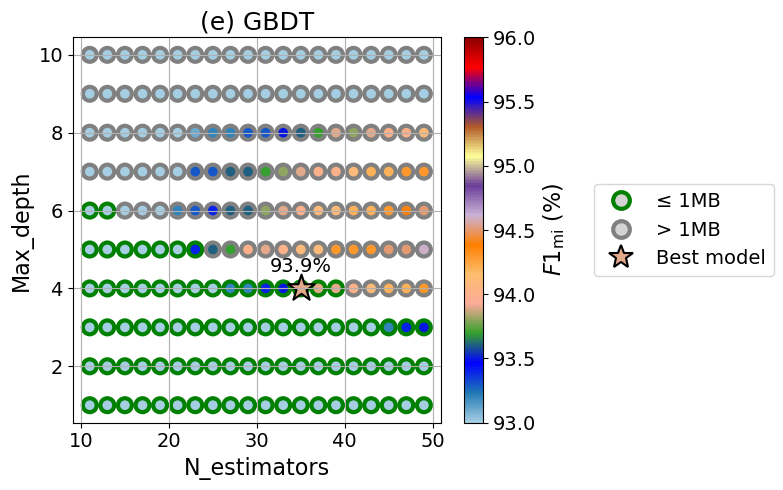

In [10]:
# #Khao sát GBDT 
# param_dist = {
#     'n_estimators': range(11, 51, 2),
#     'max_depth': range(1, 11, 1),
# }
# results = []

# # Grid Search thủ công
# for n_estimators_ in param_dist['n_estimators']:
#     for max_depth_ in param_dist['max_depth']:
#         clf1= GradientBoostingClassifier(n_estimators=n_estimators_,learning_rate=0.05, max_depth= max_depth_,random_state=45).fit(train_feature_, label_train_)
        
#         score = clf1.score(test_feature_, label_test_)
#         model_size = model_size_in_bytes(clf1) / 1024**2  # MB
#         print('score: ',round(score * 100, 1), 'ModelSize:',round(model_size,3))
#         results.append({
#             'n_estimators': n_estimators_,
#             'max_depth': max_depth_,
#             'score': round(score * 100, 1),
#             'ModelSize': round(model_size, 3)
#         })

# # Ghi file kết quả
# results_df_GBDT = pd.DataFrame(results)
# results_df_GBDT.to_csv(_dir + 'search_results_GBDT.csv', index=False)
results_df_GBDT = pd.read_csv(_dir+ 'search_results_GBDT.csv')
# Tìm mô hình tốt nhất sau khi đã có DataFrame kết quả
valid_models = results_df_GBDT[results_df_GBDT['ModelSize'] <= 1.0]
best_params = None
if not valid_models.empty:
    best_row = valid_models.sort_values(by=['score', 'n_estimators', 'max_depth'], ascending=[False, True, True]).iloc[0]
    best_params = {
        'n_estimators': int(best_row['n_estimators']),
        'max_depth': int(best_row['max_depth']),
        'score': best_row['score'],
        'ModelSize': best_row['ModelSize']
    }
# In ra thông tin mô hình tốt nhất
if best_params:
    print("Tham số tối ưu:", best_params)
else:
    print("Không có mô hình nào đạt yêu cầu kích thước ≤ 1MB.")
# Color map cho độ chính xác
color_list = ["#a6cee3", "#1f78b4", "#0000ff", "#33a02c", "#fbaa99", "#fdbf6f", "#ff7f00", "#cab2d6",
              "#6a3d9a", "#ffff99", "#b15928", "#0000ff", "#ff0000", "#8B0000"]

nodes = np.linspace(0, 1, len(color_list))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, color_list)))
norm = mcolors.Normalize(vmin=93, vmax=96)
# Khởi tạo figure với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [3, 1]})
# === Biểu đồ bên trái (không legend) ===
ax = axs[0]
valid = results_df_GBDT['ModelSize'] <= 1.0
invalid = ~valid
# Scatter plot
scatter_valid = ax.scatter(results_df_GBDT.loc[valid, 'n_estimators'],
                           results_df_GBDT.loc[valid, 'max_depth'],
                           c=results_df_GBDT.loc[valid, 'score'],
                           cmap=cmap, norm=norm, s=100,
                           edgecolors='green', linewidths=3)
scatter_invalid = ax.scatter(results_df_GBDT.loc[invalid, 'n_estimators'],
                             results_df_GBDT.loc[invalid, 'max_depth'],
                             c=results_df_GBDT.loc[invalid, 'score'],
                             cmap=cmap, norm=norm, s=100,
                             edgecolors='gray', linewidths=3)
# Best model star
if best_params:
    ax.scatter(best_params['n_estimators'], best_params['max_depth'],
               color=cmap(norm(best_params['score'])), s=400, marker='*',
               edgecolors='black', linewidths=1.5)

    ax.annotate(f"{best_params['score']:.1f}%", 
                (best_params['n_estimators'], best_params['max_depth']),
                textcoords="offset points", xytext=(0, 12), ha='center',
                fontsize=14, color='black')
# Title và nhãn
ax.set_title('(e) GBDT', fontsize=18)
ax.set_xlabel('N_estimators', fontsize=16)
ax.set_ylabel('Max_depth', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)
# Colorbar
cbar = fig.colorbar(scatter_valid, ax=ax)
cbar.set_label(r'$F1_{\mathrm{mi}}$ (%)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
# === Biểu đồ bên phải (chỉ legend) ===
ax_legend = axs[1]
ax_legend.axis('off')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='≤ 1MB',
           markerfacecolor='lightgray', markeredgecolor='green',
           markeredgewidth=3, markersize=12, linestyle='None'),
    
    Line2D([0], [0], marker='o', color='w', label='> 1MB',
           markerfacecolor='lightgray', markeredgecolor='gray',
           markeredgewidth=3, markersize=12, linestyle='None'),

    Line2D([0], [0], marker='*', color='black', label='Best model',
           markerfacecolor=cmap(norm(best_params['score'])), markeredgecolor='black',
           markeredgewidth=1.5, markersize=18, linestyle='None')
]
# Thêm legend vào subplot
ax_legend.legend(handles=legend_elements, loc='center', fontsize=14)
plt.tight_layout()
plt.show()

Tham số tối ưu: 29
Độ chính xác tối ưu: 93.7
Kích thước mô hình (MB): 0.248


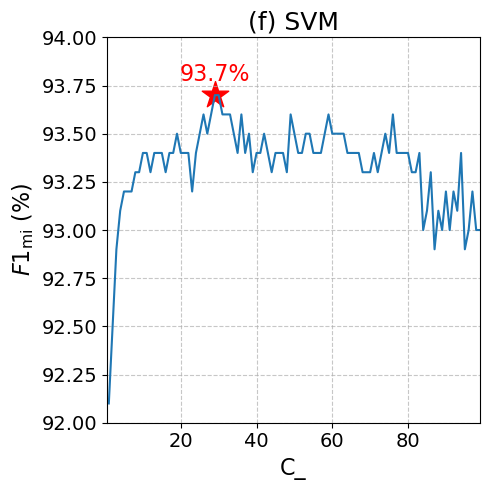

In [11]:
# # # Khao sát SVM
# param_dist = {
#     'C_': range(1, 100,1)     
# }

# # Khởi tạo một DataFrame để lưu kết quả
# results = []
# _score = 0

# for C_ in param_dist['C_']:
#     # Huấn luyện mô hình với tham số hiện tại
#     clf3 = SVC(C=C_,kernel ='linear',random_state=45, probability=True).fit(train_feature_, label_train_)
    
#     # Dự đoán trên tập kiểm tra
#     test_predict = clf3.predict(test_feature_)
    
#     # Tính toán độ chính xác
#     score = clf3.score(test_feature_,label_test_)
#     if _score < score:
#         _score = score
#         print('ModelSize:',round(model_size_in_bytes(clf3),3))
#         print(F"C =: {C_}, score: {round(score * 100, 1)}")
#     # Lưu kết quả
#     results.append({'C_': C_, 'score': round(score * 100, 1),'ModelSize':round(model_size_in_bytes(clf3)/1024**2,3)})
# # Chuyển kết quả vào DataFrame
# results_df_SVM = pd.DataFrame(results)
# results_df_SVM.to_csv(_dir+"search_results_SVM.csv", index=False)


results_df_SVM = pd.read_csv(_dir+"search_results_SVM.csv")
# Tìm best_params SAU khi đã có DataFrame
valid_models = results_df_SVM[results_df_SVM['ModelSize'] <= 1.0]
if not valid_models.empty:
    best_row = valid_models.loc[valid_models['score'].idxmax()]
    best_params = {
        'C_': int(best_row['C_']),
        'score': best_row['score'],
        'ModelSize': best_row['ModelSize']
    }

    print("Tham số tối ưu:", best_params['C_'])
    print("Độ chính xác tối ưu:", best_params['score'])
    print("Kích thước mô hình (MB):", best_params['ModelSize'])
else:
    print("Không có mô hình nào đạt yêu cầu kích thước ≤ 1MB.")
    best_params = None

# Chuẩn bị cho biểu đồ
results_df_SVM_sorted_SVM = results_df_SVM.sort_values('C_')

# Tìm vùng tô (với model ≤ 1MB)
valid_depths = valid_models['C_'].tolist()
if valid_depths:
    min_valid_depth = min(valid_depths)
    max_valid_depth = max(valid_depths)
else:
    min_valid_depth = max_valid_depth = None

# Vẽ biểu đồ
plt.figure(figsize=(5, 5))
plt.plot(results_df_SVM_sorted_SVM['C_'], results_df_SVM_sorted_SVM['score'], linestyle='-')

# # Tô vùng có kích thước model ≤ 1MB
# if min_valid_depth is not None:
#     plt.axvspan(min_valid_depth, max_valid_depth, color='green', alpha=0.25, label='Model ≤ 1MB')

# Đánh dấu điểm cao nhất trong vùng hợp lệ
if best_params:
    plt.scatter(best_params['C_'], best_params['score'], color='red', s=400, marker='*',
                label=f" max point: ({best_params['score']:.1f}%)")
    plt.annotate(f'{best_params["score"]:.1f}%', 
                 (best_params['C_'], best_params['score']),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', 
                 fontsize=16,  
                 color='red')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel('C_', fontsize=16)
plt.xlim(0.5, 99)
plt.ylim(92, 94)
plt.title('(f) SVM', fontsize=18)
plt.ylabel(r'$F1_{\mathrm{mi}}$ (%)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()
plt.show()


n_neighbors=: 1, score: 87.0
n_neighbors=: 3, score: 87.8
n_neighbors=: 5, score: 88.0
n_neighbors=: 6, score: 88.0
Tham số tối ưu: n_neighbors = 5.0
Độ chính xác tối ưu: 88.0


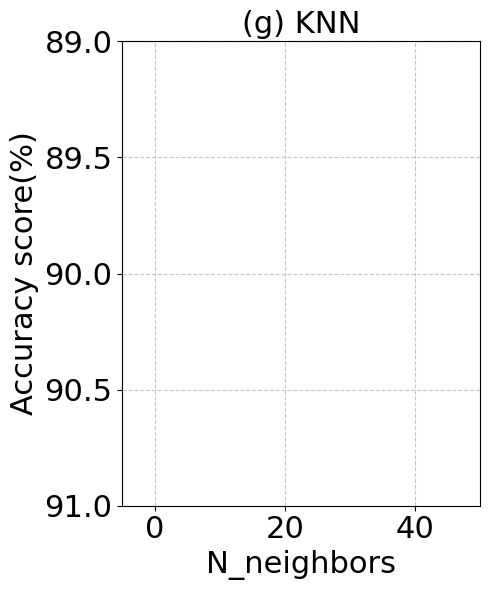

In [23]:
# #Khao sát KNN
# param_dist = {
#     'n_neighbors': range(1, 50,1)      # Độ sâu tối đa từ 10 đến 100
# }

# # Khởi tạo một DataFrame để lưu kết quả
# results = []
# _score = 0

# for n_neighbors_ in param_dist['n_neighbors']:
#     # Huấn luyện mô hình với tham số hiện tại
#     clf5 = KNeighborsClassifier(n_neighbors=n_neighbors_, weights='distance').fit(train_feature_, label_train_)
    
#     # Dự đoán trên tập kiểm tra
#     test_predict = clf5.predict(test_feature_)
    
#     # Tính toán độ chính xác
#     score = clf5.score(test_feature_,label_test_)
#     if _score < score:
#         _score = score
#         print(F"n_neighbors=: {n_neighbors_}, score: {round(score * 100, 1)}")
#     # Lưu kết quả
#     results.append({'n_neighbors': n_neighbors_, 'score': round(score * 100, 1),'ModelSize':round(model_size_in_bytes(clf5),3)})
# # Chuyển kết quả vào DataFrame
# results_df_KNN = pd.DataFrame(results)
# results_df_KNN.to_csv(_dir+"search_results_KNN.csv", index=False)


# results_df_KNN = pd.read_csv(_dir+"search_results_KNN.csv")
# # Tìm giá trị score cao nhất
# max_score = results_df_KNN['score'].max()

# # Lọc các hàng có độ chính xác bằng giá trị tối đa
# high_score_df = results_df_KNN[results_df_KNN['score'] == max_score]

# # Tìm tham số với C_ thấp nhất
# best_params = high_score_df.loc[high_score_df[['n_neighbors']].idxmin()]

# # Nếu chỉ có một bộ tham số tốt nhất
# if len(high_score_df) == 1:
#     best_params = high_score_df.iloc[0]
# else:
#     min_size = sys.maxsize
#     best_params = None
    
#     # Lặp qua từng bộ tham số và kiểm tra kích thước model
#     for _, row in high_score_df.iterrows():
#         n_neighbors_ = int(row['n_neighbors'])
        
#         # Tạo mô hình với bộ tham số hiện tại
        
#         clf5 =KNeighborsClassifier(n_neighbors=n_neighbors_, weights='distance').fit(train_feature_, label_train_)
        

#         import os
#         # Lưu mô hình vào file .pkl
#         if os.path.exists('KNN.pkl'):
#             os.remove('KNN.pkl')
#         joblib.dump(clf5, 'KNN.pkl')
#         # Kiểm tra kích thước của file đã lưu
#         model_size = os.path.getsize('KNN.pkl') / 1024  # Đơn vị KB
        
#         # Cập nhật best_params nếu kích thước nhỏ hơn
#         if model_size < min_size:
#             min_size = model_size
#             best_params = row
# # In ra bộ tham số tốt nhất
# print("Tham số tối ưu: n_neighbors =", best_params['n_neighbors'])
# print("Độ chính xác tối ưu:", best_params['score'])

# # Hiển thị 1 điểm cao nhất
# top_results_DT = results_df_KNN.nlargest(1, 'score')[['n_neighbors', 'score']]

# results_df_KNN_sorted_DT = results_df_KNN.sort_values('n_neighbors')

# # Vẽ biểu đồ đường
# plt.figure(figsize=(5, 6))
# plt.plot(results_df_KNN_sorted_DT['n_neighbors'], results_df_KNN_sorted_DT['score'], marker='none', linestyle='-')

# # Đánh dấu điểm có độ chính xác cao nhất
# max_score_idx = results_df_KNN_sorted_DT['score'].idxmax()
# max_point = results_df_KNN_sorted_DT.loc[max_score_idx]
# plt.scatter(max_point['n_neighbors'], max_point['score'], marker='*',color='red', s=500, label=f"({max_point['score']:.1f}%)")

# # Chú thích điểm cao nhất
# plt.annotate(f'{max_point["score"]:.1f}%', 
#              (max_point['n_neighbors'], max_point['score']),
#              textcoords="offset points", 
#              xytext=(0, 10), 
#              ha='center', 
#              fontsize=22,  
#              color='red')
# # Tăng kích thước chỉ số trên trục x và y
# plt.tick_params(axis='x', labelsize=22)
# plt.tick_params(axis='y', labelsize=22)
# # Cài đặt trục và tiêu đề
# plt.xlabel('N_neighbors', fontsize=22)
# plt.ylabel('Accuracy score(%)', fontsize=22)
# plt.ylim(91, max(results_df_KNN['score']) + 1)
# plt.xlim(-5, 50)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.title('(g) KNN',fontsize=22)
# plt.tight_layout()
# # Hiển thị biểu đồ
# plt.show()